In [1]:
# importing all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [3]:
train =  pd.read_csv("F:\\mldata\\New folder (3)\\train_csv.csv")

In [7]:
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [5]:
test =  pd.read_csv("F:\\mldata\\New folder (3)\\test_csv.csv")

In [6]:
test.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [9]:
train.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [10]:
train.dtypes

id           int64
time        object
feature    float64
dtype: object

In [11]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null object
feature    80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


### Feature Engineering

In [12]:
train['datetime'] = pd.to_datetime(train['time'],format='%Y-%m-%d %H:%M:%S')
train.head()

,id,time,feature,datetime
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40


In [13]:
#Date Related Features
train['year']=train['datetime'].dt.year 
train['month']=train['datetime'].dt.month 
train['day']=train['datetime'].dt.day
train['dayofweek_num']=train['datetime'].dt.dayofweek  
train['dayofweek_name']=train['datetime'].dt.weekday_name
train.head()

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday


In [14]:
#Time based Features
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40


In [15]:
#Lag Features
train['lag_1'] = train['feature'].shift(1)        #Previous feature is important to make prediction.The value at time t is greatly affected by the value of t-1     
train['lag_2'] = train['feature'].shift(2)        # The past values are known by Lags  
train['lag_3'] = train['feature'].shift(3)

train.head(5)

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second,lag_1,lag_2,lag_3
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0,NaN,NaN,NaN
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10,237.97,NaN,NaN
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20,57.93,237.97,NaN
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30,90.53,57.93,237.97
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40,260.75,90.53,57.93


In [18]:
#Rolling window feature
train['rolling_mean_3'] = train['feature'].rolling(window=3).mean()

train.head(5)

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_9
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10,237.97,NaN,NaN,NaN,NaN
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20,57.93,237.97,NaN,128.810000,NaN
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30,90.53,57.93,237.97,136.403333,NaN
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40,260.75,90.53,57.93,133.660000,NaN


In [19]:
train['rolling_mean_9'] = train['feature'].rolling(window=9).mean()
#train_1 = train[['datetime', 'rolling_mean_3', 'feature']]
train.head(5)

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_9
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10,237.97,NaN,NaN,NaN,NaN
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20,57.93,237.97,NaN,128.810000,NaN
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30,90.53,57.93,237.97,136.403333,NaN
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40,260.75,90.53,57.93,133.660000,NaN


In [20]:
train['rolling_mean_12'] = train['feature'].rolling(window=12).mean()

train.head(5)

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_9,rolling_mean_12
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10,237.97,NaN,NaN,NaN,NaN,NaN
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20,57.93,237.97,NaN,128.810000,NaN,NaN
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30,90.53,57.93,237.97,136.403333,NaN,NaN
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40,260.75,90.53,57.93,133.660000,NaN,NaN


In [21]:
train['expanding_mean'] = train['feature'].expanding(2).mean()

train.head(5)

,id,time,feature,datetime,year,month,day,dayofweek_num,dayofweek_name,hour,minute,second,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_9,rolling_mean_12,expanding_mean
0,0,2019-03-19 00:00:00,237.97,2019-03-19 00:00:00,2019,3,19,1,Tuesday,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-03-19 00:00:10,57.93,2019-03-19 00:00:10,2019,3,19,1,Tuesday,0,0,10,237.97,NaN,NaN,NaN,NaN,NaN,147.950
2,2,2019-03-19 00:00:20,90.53,2019-03-19 00:00:20,2019,3,19,1,Tuesday,0,0,20,57.93,237.97,NaN,128.810000,NaN,NaN,128.810
3,3,2019-03-19 00:00:30,260.75,2019-03-19 00:00:30,2019,3,19,1,Tuesday,0,0,30,90.53,57.93,237.97,136.403333,NaN,NaN,161.795
4,4,2019-03-19 00:00:40,49.70,2019-03-19 00:00:40,2019,3,19,1,Tuesday,0,0,40,260.75,90.53,57.93,133.660000,NaN,NaN,139.376


In [22]:
import datetime

In [23]:
#Statistical Test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    dftest = adfuller(train['feature'])

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test ')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

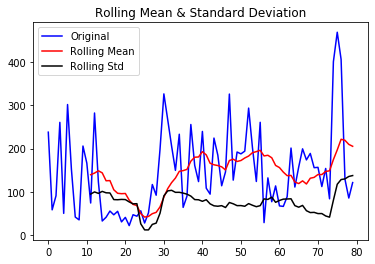

Results of Dickey-Fuller Test 
Test Statistics               -5.945866e+00
p-value                        2.205049e-07
#lags used                     0.000000e+00
Number of observations used    7.900000e+01
Critical Value(1%)            -3.515977e+00
Critical Value(5%)            -2.898886e+00
Critical Value(10%)           -2.586694e+00
dtype: float64


In [24]:
test_stationarity(train['feature'])

##### the p-value 2 which is greater than the significance level (0.05), we fail to reject the null hypothesis & it confirms that the series is not stationary.



In [26]:
#from datetime import datetime

#from statsmodels.tsa.stattools import adfuller
#from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

## Autocorelation Plot


In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

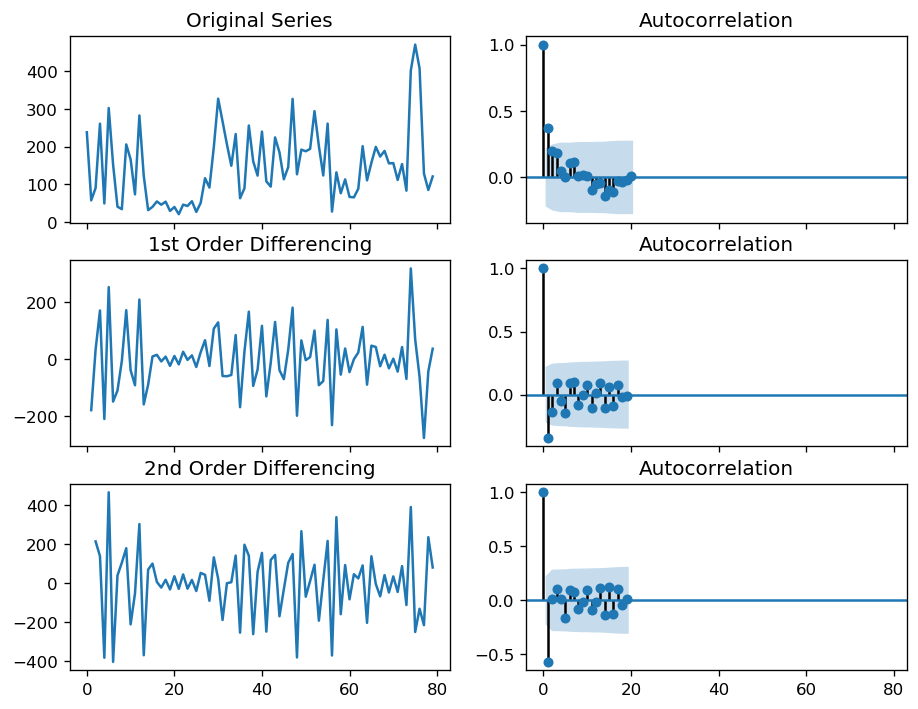

In [28]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)                     #With 3 rows and 2 columns(3,2)         
axes[0, 0].plot(train.feature); axes[0, 0].set_title('Original Series')       #with axes 0(0,0)
plot_acf(train.feature, ax=axes[0, 1])                                        #1st row 1st column(0,1)


# 1st Differencing          The purpose of differencing is to make the time series Stationary
axes[1, 0].plot(train.feature.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.feature.diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(train.feature.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.feature.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
#axes[3, 0].plot(train.feature.diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
#plot_acf(train.feature.diff().diff().dropna(), ax=axes[3, 1])


plt.show()

## For the above series the time series reaches stationarity with two orders of differencing


#### But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

## Let's fix the value of d as 1


In [29]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

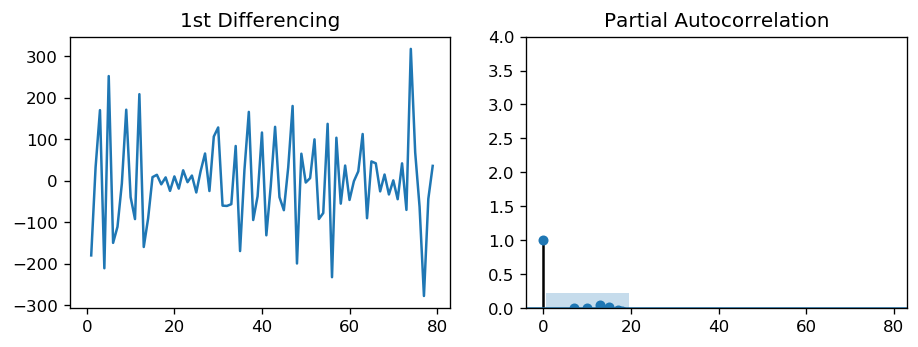

In [30]:
fig, axes = plt.subplots(1, 2, sharex=True)  #1 row 2 columns
axes[0].plot(train.feature.diff()); axes[0].set_title('1st Differencing')  #1st box
axes[1].set(ylim=(0,4))   #0 to 5
plot_pacf(train.feature.diff().dropna(), ax=axes[1])


plt.show()

#The PACF lag 1 is above the signifucance line. Fix p as 1

## You can observe that the PACF lag 1 is quite significant since is well above the significance line(blue region)

## So Let's fix the value of p as 1(AR terms)


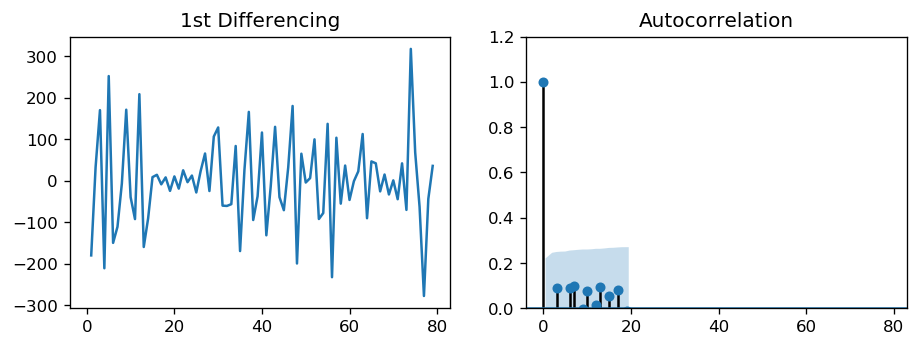

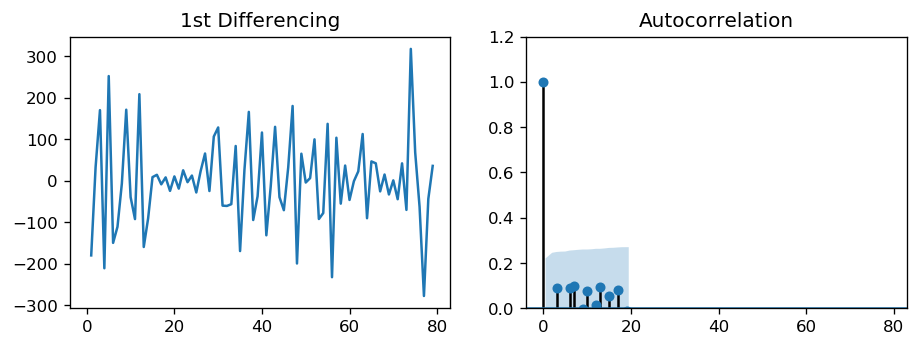

In [31]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.feature.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train.feature.diff().dropna(), ax=axes[1])

#The ACF tells how many MA terms
#You can observe the ACF only lag 1 is quite above the significance line(blue region)  
#Fix q as 1

## only one lag is above the signicance level

## Let's fix the value of q as 1(MA terms)


In [ ]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train.feature, order=(1,1,2))
model_fit = model.fit()  #disp=0
print(model_fit.summary())

In [ ]:
# Actual vs Fitted
plt.rcParams.update({'figure.figsize':(9,2), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()

In [32]:
# Out-of-Time cross-validation,need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.
training = train.feature[0:40]
testing = train.feature[40:]
training,testing

(0     237.97
 1      57.93
 2      90.53
 3     260.75
 4      49.70
 5     302.08
 6     152.25
 7      41.19
 8      34.61
 9     205.87
 10    166.23
 11     73.75
 12    282.46
 13    122.71
 14     32.04
 15     40.73
 16     55.06
 17     46.40
 18     54.46
 19     29.97
 20     40.43
 21     21.36
 22     46.59
 23     43.11
 24     55.62
 25     27.36
 26     50.94
 27    116.61
 28     91.80
 29    198.32
 30    326.76
 31    266.69
 32    205.95
 33    149.42
 34    233.22
 35     63.63
 36     89.77
 37    255.79
 38    161.08
 39    123.41
 Name: feature, dtype: float64, 40    239.69
 41    108.12
 42     94.31
 43    224.30
 44    184.75
 45    113.74
 46    146.06
 47    326.35
 48    126.81
 49    192.00
 50    187.70
 51    194.04
 52    293.84
 53    201.54
 54    123.67
 55    260.87
 56     28.26
 57    131.97
 58     76.73
 59    113.35
 60     67.01
 61     65.89
 62     88.47
 63    201.17
 64    110.79
 65    157.37
 66    199.37
 67    173.72
 68    188.69
 69

In [ ]:
#training.plot( title= 'All day features', fontsize=7) 
#testing.plot( title= 'All day features', fontsize=7) 
#plt.show()

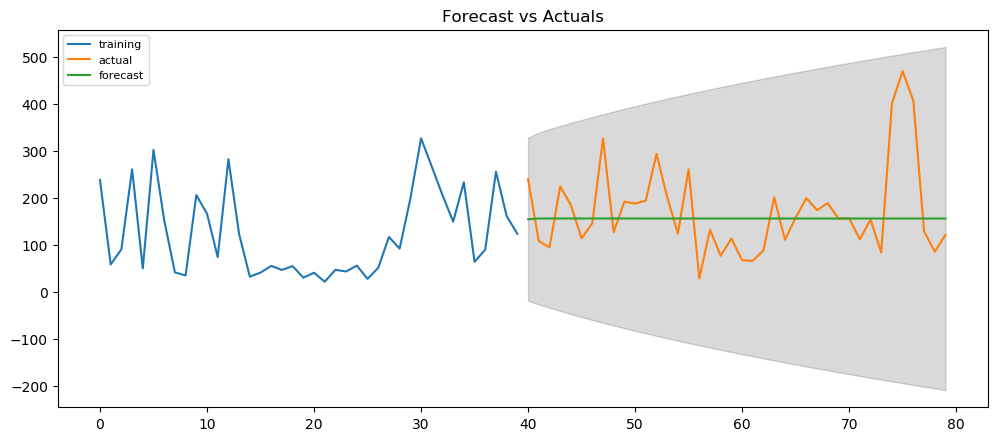

In [34]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(training, order=(1, 1, 1))  
fitted = model.fit(disp=0)  

fc, se, conf = fitted.forecast(40, alpha=0.05)  # 80% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testing.index)
lower_series = pd.Series(conf[:, 0], index=testing.index)
upper_series = pd.Series(conf[:, 1], index=testing.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(training, label='training')
plt.plot(testing, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:              D.feature   No. Observations:                   39
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -229.919
Method:                       css-mle   S.D. of innovations             87.207
Date:                Tue, 16 Jun 2020   AIC                            469.838
Time:                        12:20:03   BIC                            478.156
Sample:                             1   HQIC                           472.822
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2829      6.954      0.041      0.968     -13.347      13.913
ar.L1.D.feature    -0.6159      0.359     -1.714      0.095      -1.320       0.088
ar.L2.D.feature    -0.4442      

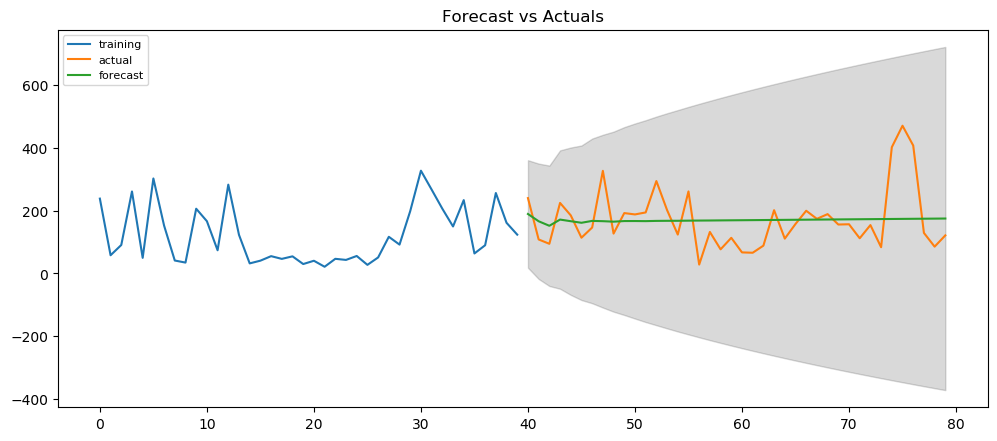

In [35]:
model = ARIMA(training, order=(2, 1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testing.index)
lower_series = pd.Series(conf[:, 0], index=testing.index)
upper_series = pd.Series(conf[:, 1], index=testing.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(training, label='training')
plt.plot(testing, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({ 'rmse':rmse})

forecast_accuracy(fc, testing)

{'rmse': 94.50925979333549}

In [37]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-testing)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, testing)

C:\Users\dell\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.5562961308849588,
 'me': -2.6858581256337333,
 'mae': 69.6186025937998,
 'mpe': 0.32861089611409766,
 'rmse': 94.50925979333549,
 'acf1': 0.36629700806824306,
 'corr': 0.23378516024598772,
 'minmax': 0.3119827840154187}

In [38]:
train.to_csv("Final_Set.csv", index = False)

### For ARIMA model rms is 94%